In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.shape

(150, 6)

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

# 
Describing The Data Sets

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 
Correlation and Heatmap:

In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


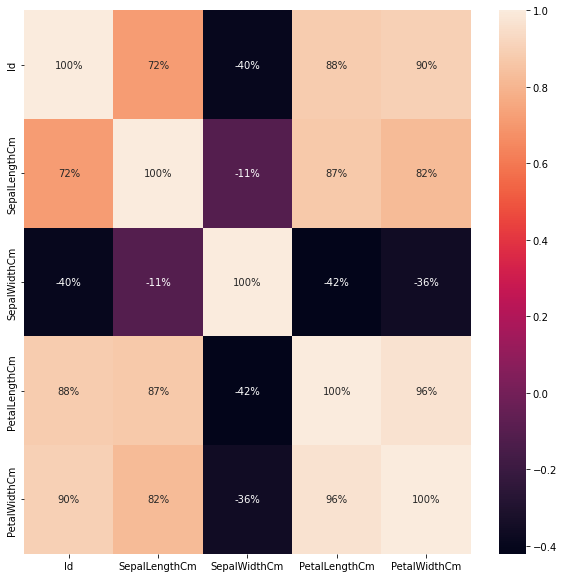

In [9]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(), annot=True,fmt='.0%')
plt.show()

# 
Visualize the Count:

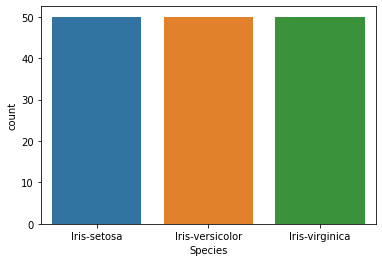

In [10]:
sns.countplot(x=df['Species'],label="No_of_Count")
plt.show()

# 
Performing Multivariate Analysis:

<Figure size 576x360 with 0 Axes>

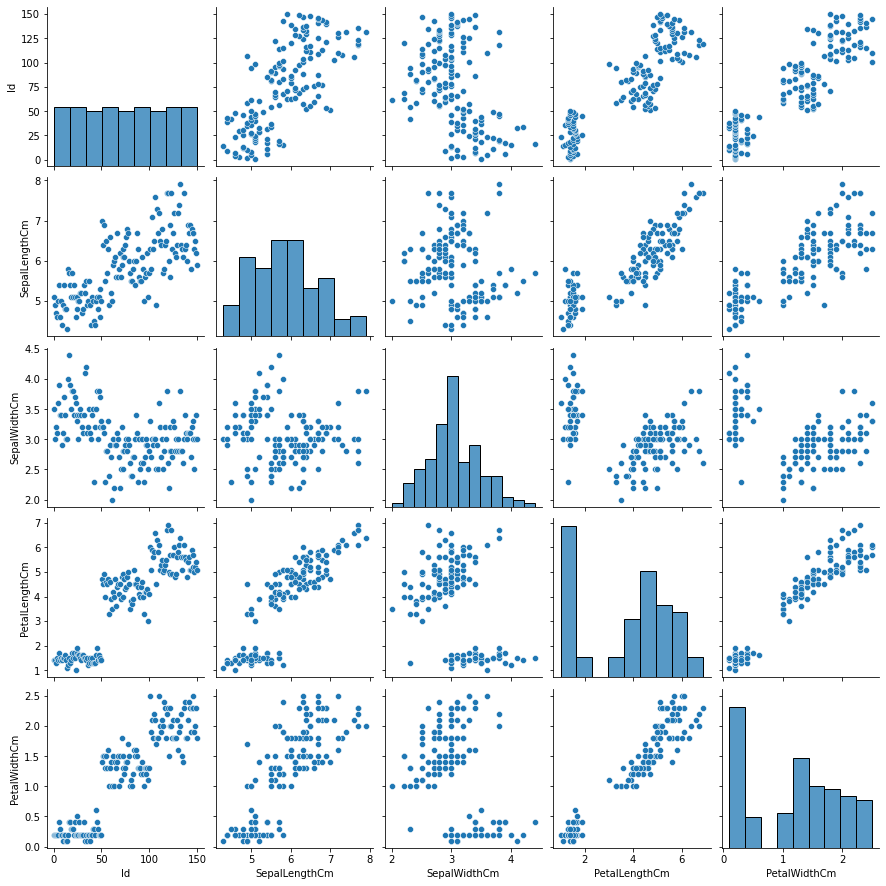

In [11]:
plt.figure(figsize=(8,5))
sns.pairplot(df)
plt.show()

# 
Encoding the Categorical Data Values:

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
s=labelencoder_Y.fit_transform(df.iloc[:,5].values) 

#To Make Changes to the Database Using Encoded Value
df.iloc[:,5]=s

In [13]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# 
Split the Dataset into Independent (x) & dependent (Y) Data Sets:

In [14]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

# 
Split the Dataset into 70% Training and 30% Testing:

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size =0.30, random_state=0)

# 
Performing Feature Scaling:

In [16]:
from sklearn.preprocessing import StandardScaler
std_sc= StandardScaler()
x_train=std_sc.fit_transform(x_train)
x_test=std_sc.fit_transform(x_test)

# 
Building the Decision Tree Model:

In [17]:
from sklearn.tree import DecisionTreeClassifier
dec_tree= DecisionTreeClassifier(criterion= "entropy", random_state=0)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
y_pred=dec_tree.predict(x_test)

#
Checking Accuracy of Model:

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9111111111111111

#
Confusion Matrix(Easiest Way):

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 14,  4],
       [ 0,  0, 11]], dtype=int64)

#
Classification Report Of the Model:

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



#
Visualize the Decision Tree:

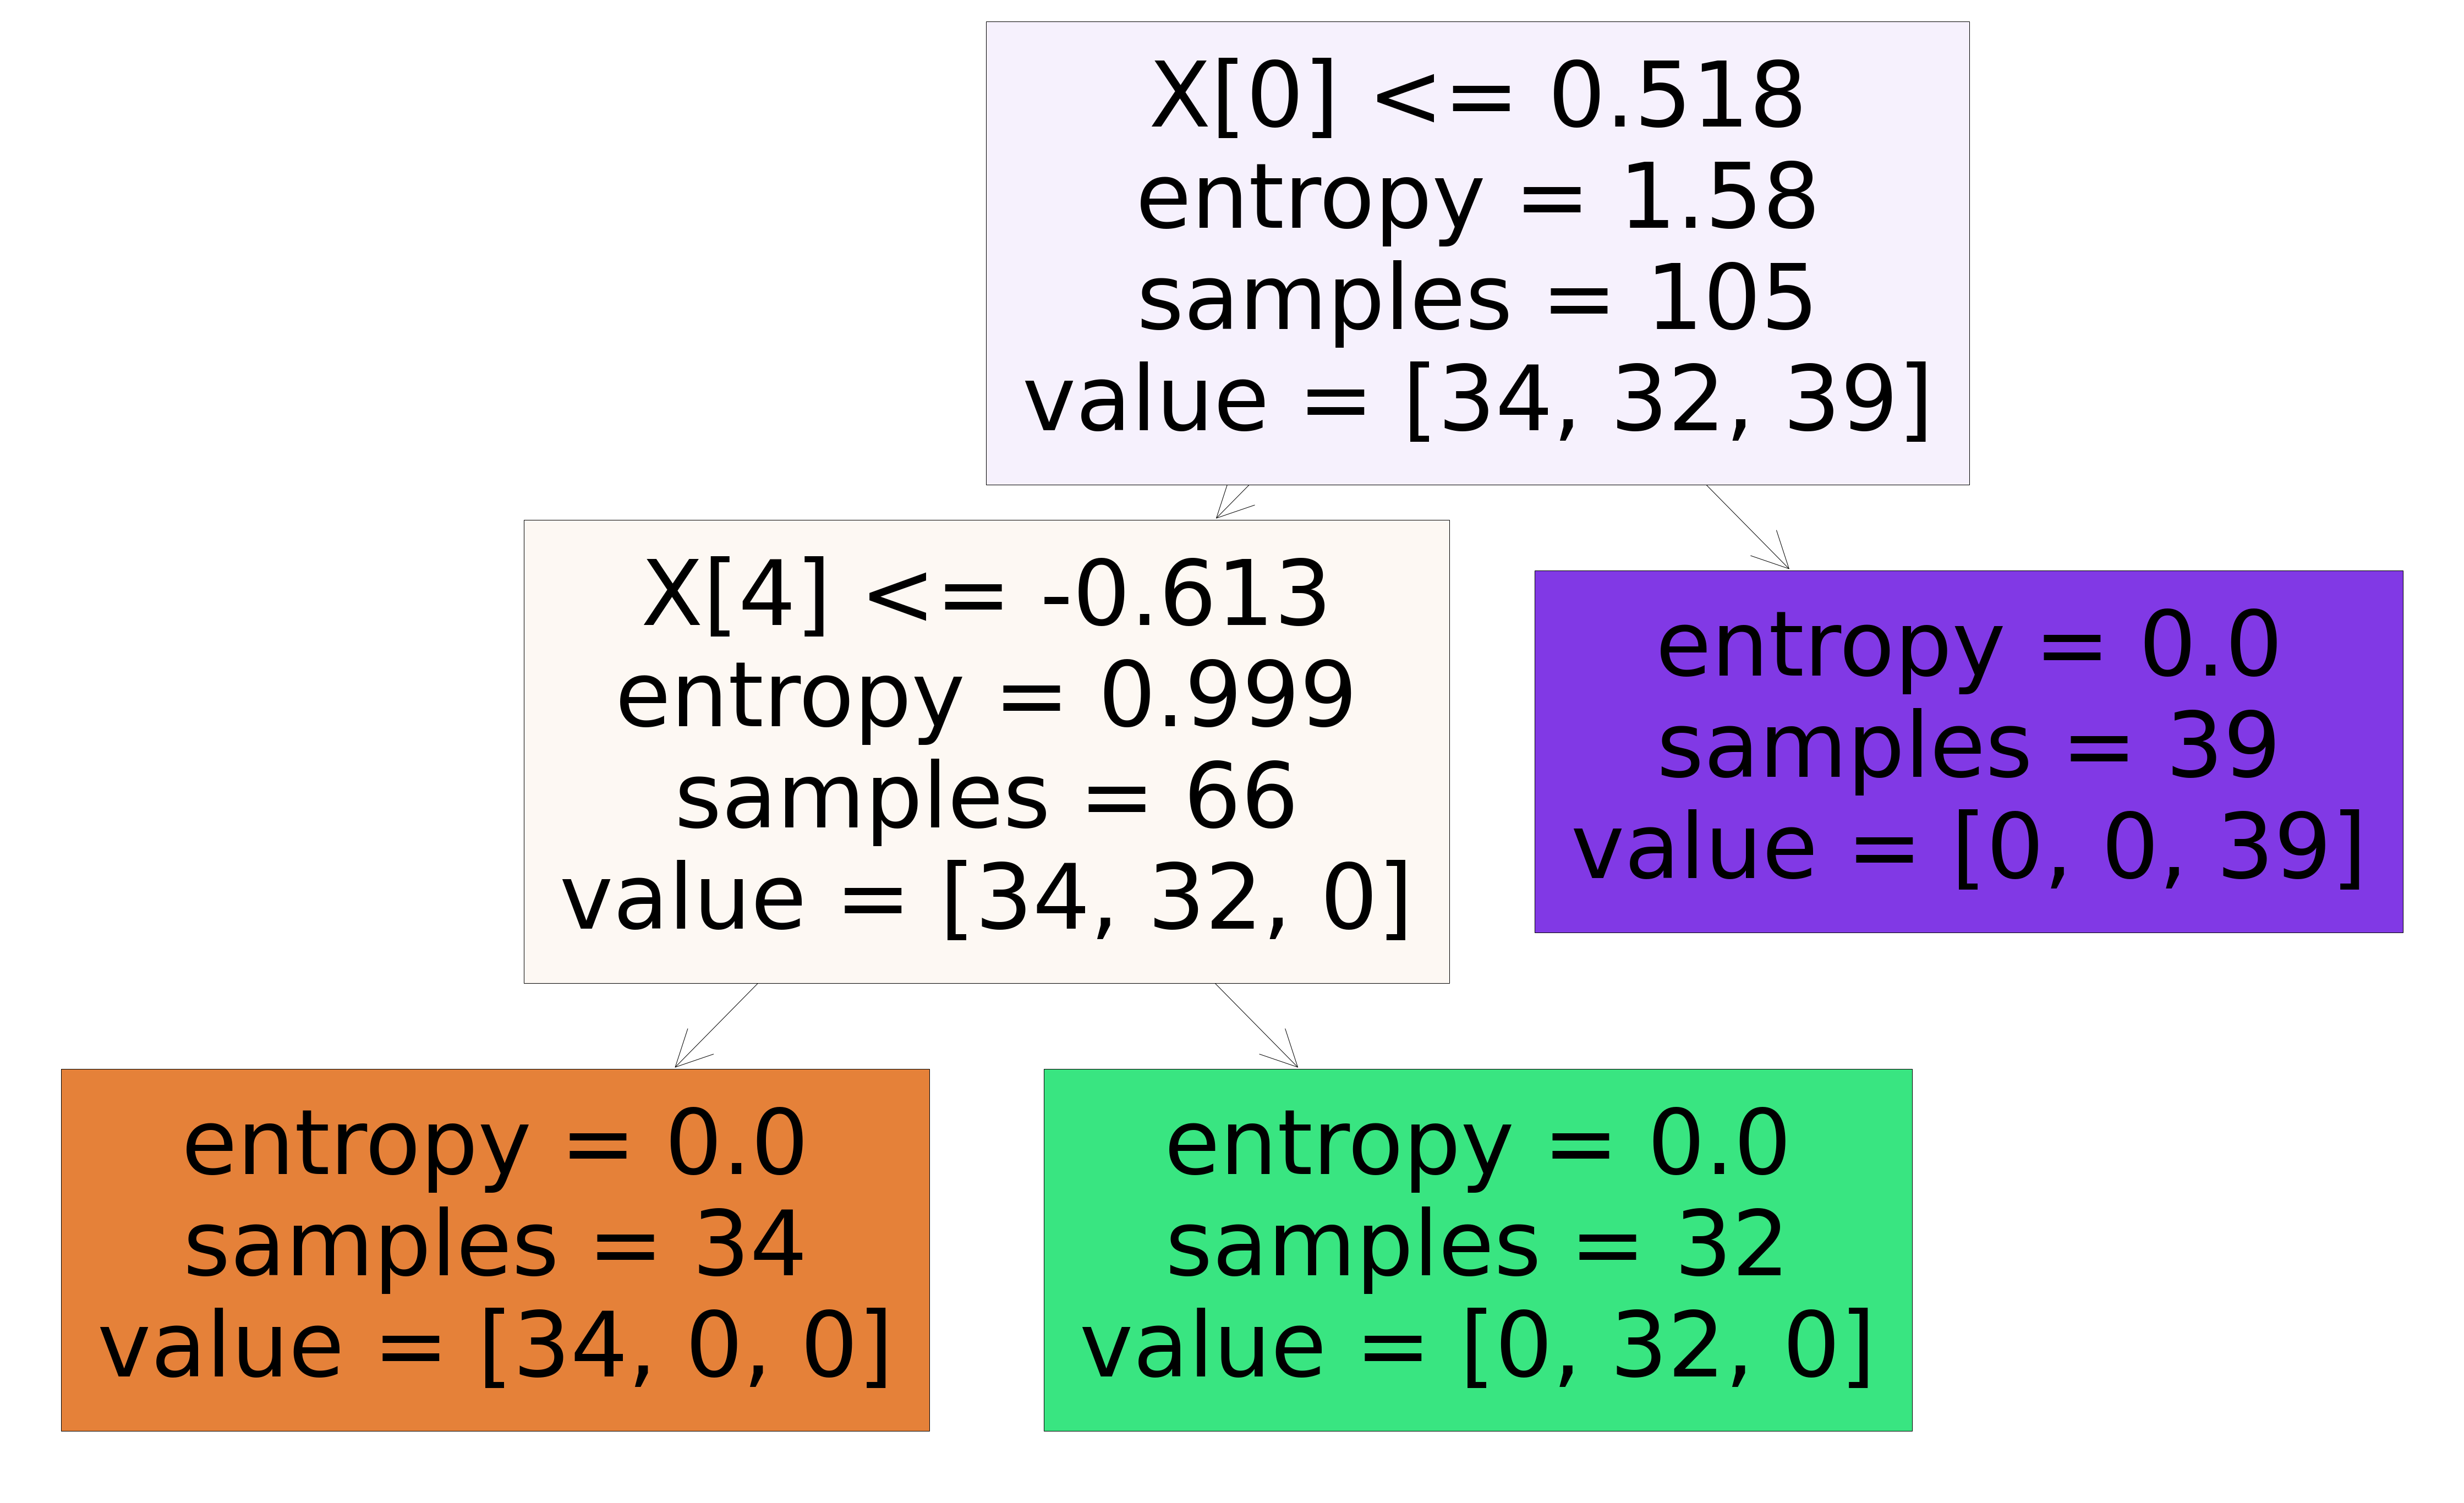

In [22]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
plot_tree(dec_tree,filled=True)
plt.show()

# 
Predicting the Flower Species:


In [23]:
Id=int(input("Enter Id:"))
Sepal_Length=float(input("Enter Sepal Length:"))
Sepal_Width=float(input("Enter Sepal Width:"))
Petal_Length=float(input("Enter Petal Length:"))
Petal_Width=float(input("Enter Petal Width:"))
y_pred=dec_tree.predict([[Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width]])

Enter Id:100
Enter Sepal Length:6.3
Enter Sepal Width:3.3
Enter Petal Length:6
Enter Petal Width:2.5


In [24]:
if y_pred==2:
  print("Flower Species is Iris-Virginica")
elif y_pred==0:
  print("Flower Species is Iris-Setosa")
elif y_pred==1:
  print("Flower Species is Iris-Versicolor")

Flower Species is Iris-Virginica
